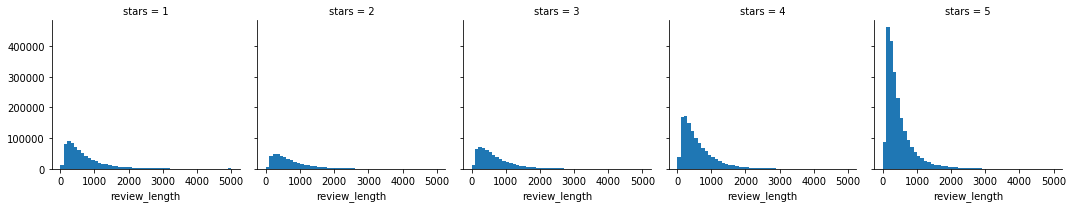

In [14]:
from __future__ import print_function
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import seaborn as sns
import pandas as pd

spark = SparkSession.builder.appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.json("file:///Users/yashparikh/Project/dataset/review.json")
df.createOrReplaceTempView("reviews")
length_vs_star_DF = spark.sql("SELECT length(text) as review_length, stars FROM reviews").toPandas()
review_len_by_stars = sns.FacetGrid(data=length_vs_star_DF, col='stars')
review_len_by_stars.map(plt.hist, 'review_length', bins=50)


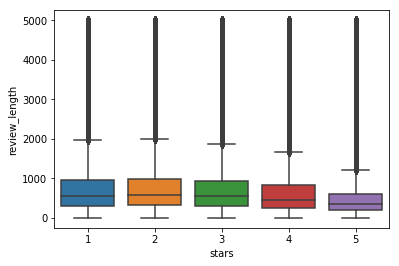

In [15]:
sns.boxplot(x='stars', y='review_length', data=length_vs_star_DF)

In [1]:
from __future__ import print_function
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import seaborn as sns
import pandas as pd

spark = SparkSession.builder.appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.json("file:///Users/yashparikh/Project/dataset/review.json")
df.createOrReplaceTempView("reviews")
corr_DF = spark.sql("SELECT cool, funny, useful, length(text) as review_length, stars FROM reviews").toPandas()
corr_DF
# review_len_by_stars = sns.FacetGrid(data=length_vs_star_DF, col='stars')
# review_len_by_stars.map(plt.hist, 'review_length', bins=50)

,cool,funny,useful,review_length,stars
0,0,0,0,289,5
1,0,0,0,213,5
2,0,0,0,502,5
3,0,0,0,373,5
4,0,0,0,523,4
5,0,0,0,230,4
6,0,0,1,471,5
7,2,0,0,601,4
8,0,0,1,251,4
9,0,0,1,244,3


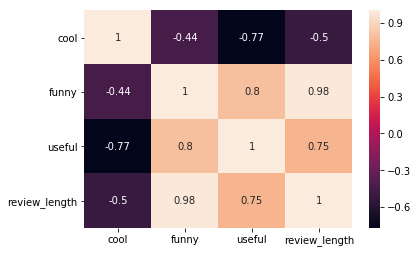

In [4]:
corrPlotDF = corr_DF.groupby('stars').mean()
sns.heatmap(data=corrPlotDF.corr(), annot=True)

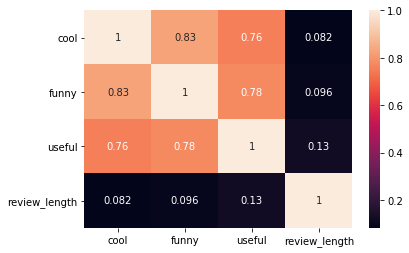

In [10]:
corrPlotOneStarDF = spark.sql("SELECT cool, funny, useful, length(text) as review_length FROM reviews WHERE stars = 1").toPandas()
sns.heatmap(data=corrPlotOneStarDF.corr(), annot=True)



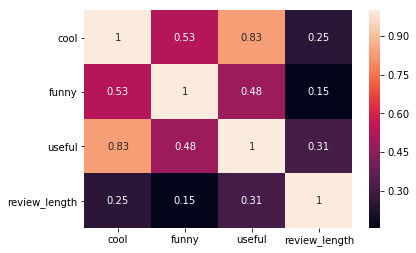

In [11]:
corrPlotFiveStarDF = spark.sql("SELECT cool, funny, useful, length(text) as review_length FROM reviews WHERE stars = 5").toPandas()
sns.heatmap(data=corrPlotFiveStarDF.corr(), annot=True)